Импорт нескольких библиотек, которые будут использовать для построения модели:

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('file1.csv').set_index('Date/Time')
# Удаляем ненужные столбцы
df = df.drop(['temp_min', 'temp_max', 'sea_level', 'lon_1', 'lon_2', 'lon_3'], axis=1)

In [5]:
df.describe().T

count unique          top   freq
lon          732495  19178          lon  21543
lat          732495  18385          lat  21543
temp         732495  25262         temp  21543
pressure     732495  24708     pressure  21543
humidity     732495     98          100  76062
speed        732495   1414        speed  21543
temp_1       732495  24532       temp_1  21543
temp_2       732495  24683       temp_2  21543
temp_3       732495  24699       temp_3  21543
temp_min_1   732495  25836   temp_min_1  21543
temp_min_2   732495  26919   temp_min_2  21543
temp_min_3   732495  27726   temp_min_3  21543
temp_max_1   732495  25803   temp_max_1  21543
temp_max_2   732495  26846   temp_max_2  21543
temp_max_3   732495  27723   temp_max_3  21543
pressure_1   732495  24729   pressure_1  21543
pressure_2   732495  24356   pressure_2  21543
pressure_3   732495  24639   pressure_3  21543
sea_level_1  732495   5232  sea_level_1  21543
sea_level_2  732495   5230  sea_level_2  21543
sea_level_3  732495   5229  sea_level_3  21543
humidity_1   732495     98        100.0  75787
humidity_2   732495     98        100.0  75815
humidity_3   732495     98        100.0  76265
speed_1      732495   1432      speed_1  21543
speed_2      732495   1450      speed_2  21543
speed_3      732495   1454      speed_3  21543

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 732495 entries, 2017-03-14 21:00:00 to 2017-03-18 21:00:00
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   lon          732495 non-null  object
 1   lat          732495 non-null  object
 2   temp         732495 non-null  object
 3   pressure     732495 non-null  object
 4   humidity     732495 non-null  object
 5   speed        732495 non-null  object
 6   temp_1       732495 non-null  object
 7   temp_2       732495 non-null  object
 8   temp_3       732495 non-null  object
 9   temp_min_1   732495 non-null  object
 10  temp_min_2   732495 non-null  object
 11  temp_min_3   732495 non-null  object
 12  temp_max_1   732495 non-null  object
 13  temp_max_2   732495 non-null  object
 14  temp_max_3   732495 non-null  object
 15  pressure_1   732495 non-null  object
 16  pressure_2   732495 non-null  object
 17  pressure_3   732495 non-null  object
 18  sea_level_1  73249

Обратите внимание, что тип данных каждого столбца имеет тип “объект”. Нам нужно преобразовать все эти столбцы признаков в поплавки для того типа численного анализа, который мы надеемся выполнить. Для этого я буду использовать метод apply() DataFrame, чтобы применить метод Pandas to_numeric ко всем значениям фрейма данных. Параметр error='coerce' заполнит любые текстовые значения в NaNs .

In [7]:
df = df.apply(pd.to_numeric, errors='coerce')
# df.dropha() возвращает DataFrame, из которого были удалены записи NA.
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 710952 entries, 2017-03-14 21:00:00 to 2017-03-18 21:00:00
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   lon          710952 non-null  float64
 1   lat          710952 non-null  float64
 2   temp         710952 non-null  float64
 3   pressure     710952 non-null  float64
 4   humidity     710952 non-null  float64
 5   speed        710952 non-null  float64
 6   temp_1       710952 non-null  float64
 7   temp_2       710952 non-null  float64
 8   temp_3       710952 non-null  float64
 9   temp_min_1   710952 non-null  float64
 10  temp_min_2   710952 non-null  float64
 11  temp_min_3   710952 non-null  float64
 12  temp_max_1   710952 non-null  float64
 13  temp_max_2   710952 non-null  float64
 14  temp_max_3   710952 non-null  float64
 15  pressure_1   710952 non-null  float64
 16  pressure_2   710952 non-null  float64
 17  pressure_3   710952 non-null  float64
 18

In [8]:
# X1 будет дата фремом из всех колонок кроме Temp_C', 'Rel_Hum', 'Wind_Speed_km', 'Press_mm_Hg'
X1 = df[[col for col in df.columns if (col != 'temp' and col != 'pressure' and col != 'humidity' and col != 'speed')]]
# y1 - цель, то есть как раз таки 'Temp_C' (средняя температура)
y1 = df['temp']
# X2 будет дата фремом из всех колонок кроме Temp_C', 'Rel_Hum', 'Wind_Speed_km', 'Press_mm_Hg'
X2 = df[[col for col in df.columns if (col != 'temp' and col != 'pressure' and col != 'humidity' and col != 'speed')]]
# y2 - цель, то есть как раз таки 'Wind_Speed_km' (скорость ветра)
y2 = df['speed']
# X3 будет дата фремом из всех колонок кроме Temp_C', 'Rel_Hum', 'Wind_Speed_km', 'Press_mm_Hg'
X3 = df[[col for col in df.columns if (col != 'temp' and col != 'pressure' and col != 'humidity' and col != 'speed')]]
# y3 - цель, то есть как раз таки 'Press_mm_Hg' (давление)
y3 = df['pressure']
# X4 будет дата фремом из всех колонок кроме Temp_C', 'Rel_Hum', 'Wind_Speed_km', 'Press_mm_Hg'
X4 = df[[col for col in df.columns if (col != 'temp' and col != 'pressure' and col != 'humidity' and col != 'speed')]]
# y4 - цель, то есть как раз таки 'Press_mm_Hg' (влажность)
y4 = df['humidity']

Для обучающего набора будем использовать 80 процентов данных, а для набора тестирования и проверки они будут составлять по 10% от оставшихся данных.

In [9]:
# Разделим данные на обучающий набор и временный набор, используя sklearn.model_selection.traing_test_split
X1_train, X1_tmp, y1_train, y1_tmp = train_test_split(X1, y1, test_size=0.2, random_state=23)
X2_train, X2_tmp, y2_train, y2_tmp = train_test_split(X2, y2, test_size=0.2, random_state=23)
X3_train, X3_tmp, y3_train, y3_tmp = train_test_split(X3, y3, test_size=0.2, random_state=23)
X4_train, X4_tmp, y4_train, y4_tmp = train_test_split(X4, y4, test_size=0.2, random_state=23)

In [10]:
# Возьмём оставшиеся 20% данных в X1_tmp, y1_tmp и разделим их поровну на тестовый набор и на набор проверки
X1_test, X1_val, y1_test, y1_val = train_test_split(X1_tmp, y1_tmp, test_size=0.5, random_state=23)

X1_train.shape, X1_test.shape, X1_val.shape
print("Training instances   {}, Training features   {}".format(X1_train.shape[0], X1_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X1_val.shape[0], X1_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X1_test.shape[0], X1_test.shape[1]))

Training instances   568761, Training features   23
Validation instances 71096, Validation features 23
Testing instances    71095, Testing features    23


In [11]:
# Возьмём оставшиеся 20% данных в X2_tmp, y2_tmp и разделим их поровну на тестовый набор и на набор проверки
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_tmp, y2_tmp, test_size=0.5, random_state=23)

X2_train.shape, X2_test.shape, X2_val.shape
print("Training instances   {}, Training features   {}".format(X2_train.shape[0], X2_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X2_val.shape[0], X2_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X2_test.shape[0], X2_test.shape[1]))

Training instances   568761, Training features   23
Validation instances 71096, Validation features 23
Testing instances    71095, Testing features    23


In [12]:
# Возьмём оставшиеся 20% данных в X3_tmp, y3_tmp и разделим их поровну на тестовый набор и на набор проверки
X3_test, X3_val, y3_test, y3_val = train_test_split(X3_tmp, y3_tmp, test_size=0.5, random_state=23)

X3_train.shape, X3_test.shape, X3_val.shape
print("Training instances   {}, Training features   {}".format(X1_train.shape[0], X3_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X1_val.shape[0], X3_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X1_test.shape[0], X3_test.shape[1]))

Training instances   568761, Training features   23
Validation instances 71096, Validation features 23
Testing instances    71095, Testing features    23


In [13]:
# Возьмём оставшиеся 20% данных в X_tmp, y_tmp и разделим их поровну на тестовый набор и на набор проверки
X4_test, X4_val, y4_test, y4_val = train_test_split(X4_tmp, y4_tmp, test_size=0.5, random_state=23)

X4_train.shape, X4_test.shape, X4_val.shape
print("Training instances   {}, Training features   {}".format(X4_train.shape[0], X4_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X4_val.shape[0], X4_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X4_test.shape[0], X4_test.shape[1]))

Training instances   568761, Training features   23
Validation instances 71096, Validation features 23
Testing instances    71095, Testing features    23


Первым шагом при построении нейросетевой модели является создание экземпляра tf.estimator.DNNRegressor(...) класс. Конструктор класса имеет несколько параметров, но я сосредоточусь на следующем:

feature_columns : Структура типа списка, содержащая определение имени и типов данных для объектов, вводимых в модель hidden_units : Список-подобная структура, содержащая определение ширины и глубины числа нейронной сети optimizer : Экземпляр подкласса tf.Optimizer , который оптимизирует вес модели во время обучения; по умолчанию используется оптимизатор AdaGrad. activation_fn : Функция активации, используемая для введения нелинейности в сеть на каждом уровне; по умолчанию используется (https://en.wikipedia.org/wiki/Rectifier_(neural_networks)). model_dir : Каталог, который будет создан, который будет содержать метаданные и другие сохраненные контрольные точки для модели Я начну с определения списка числовых столбцов объектов. Для этого я использую функцию tf.feature_column.numeric_column () , которая возвращает экземпляр Feature Column для числовых объектов с непрерывным значением.

In [14]:
feature_cols1 = [tf.feature_column.numeric_column(col) for col in X1.columns]
feature_cols2 = [tf.feature_column.numeric_column(col) for col in X2.columns]
feature_cols3 = [tf.feature_column.numeric_column(col) for col in X3.columns]
feature_cols4 = [tf.feature_column.numeric_column(col) for col in X4.columns]

С помощью определенных столбцов функций я теперь могу создать экземпляр класса DNNRegressor и сохранить его в переменной regressor. Я уточняю, что мне нужна нейронная сеть, имеющая два слоя глубиной, где оба слоя имеют ширину 50 узлов. Я также указываю, что хочу, чтобы данные моих моделей хранились в каталогах с именами Temperature_prediction_model_new, Wind_Speed_prediction_model_new, Pressure_prediction_model_new, Humidity_prediction_model_new соответственно.

In [23]:
regressor1 = tf.estimator.DNNRegressor(feature_columns=feature_cols1,
                                      hidden_units=[50, 50],
                                      model_dir='Temperature_prediction_model_new')
regressor2 = tf.estimator.DNNRegressor(feature_columns=feature_cols2,
                                      hidden_units=[50, 50],
                                      model_dir='Wind_Speed_prediction_model_new')
regressor3 = tf.estimator.DNNRegressor(feature_columns=feature_cols3,
                                      hidden_units=[50, 50],
                                      model_dir='Pressure_prediction_model_new')
regressor4 = tf.estimator.DNNRegressor(feature_columns=feature_cols4,
                                      hidden_units=[50, 50],
                                      model_dir='Humidity_prediction_model_new')

Следующее, что я хочу сделать, – это определить повторно используемую функцию, которая обычно называется “функцией ввода”, которую я буду называть wx_input_fn(...) . Эта функция будет использоваться для подачи данных в мою нейронную сеть на этапах обучения и тестирования. Существует много различных способов построения входных функций, но я буду описывать, как определить и использовать одну из них на основе tf.estimator.inputs.pandas_input_fn(...) поскольку мои данные находятся в структурах данных pandas.

In [16]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=4000):
    return tf.compat.v1.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

Обратим внимание, что эта функция wx_input_fn(...) принимает один обязательный и четыре необязательных параметра, которые затем передаются входной функции TensorFlow специально для данных pandas, которые возвращаются. Это очень мощная функция API TensorFlow (а также Python и других языков, которые рассматривают функции как граждан первого класса).

Параметры функции определяются следующим образом:

X : Входные функции, которые будут подаваться в один из трех методов интерфейса DNNRegressor ( train , evaluate и predict ) y : Целевые значения X , которые являются необязательными и не будут предоставлены вызову predict num_epochs : Необязательный параметр. Эпоха возникает, когда алгоритм выполняется по всему набору данных один раз. shuffle : Необязательный параметр, указывающий, следует ли случайным образом выбирать пакет (подмножество) набора данных при каждом выполнении алгоритма batch_size : Количество выборок, включаемых при каждом выполнении алгоритма.

Определим простой цикл обучения, чтобы обучить модели на обучающих данных и периодически оценивать их на оценочных данных.

In [36]:
evaluations1 = []
STEPS = 400
for i in range(100):
    regressor1.train(input_fn=wx_input_fn(X1_train, y=y1_train), steps=STEPS)
    evaluation1 = regressor1.evaluate(input_fn=wx_input_fn(X1_val, y1_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations1.append(regressor1.evaluate(input_fn=wx_input_fn(X1_val,
                                                               y1_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

Instructions for updating:
Use standard file utilities to get mtimes.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


In [37]:
print(evaluations1)

[{'average_loss': 41.324924, 'label/mean': 286.32733, 'loss': 41.323013, 'prediction/mean': 286.4206, 'global_step': 400}, {'average_loss': 29.527773, 'label/mean': 286.32733, 'loss': 29.519135, 'prediction/mean': 286.25208, 'global_step': 800}, {'average_loss': 25.674124, 'label/mean': 286.32733, 'loss': 25.662514, 'prediction/mean': 286.25833, 'global_step': 1200}, {'average_loss': 23.81292, 'label/mean': 286.32733, 'loss': 23.799915, 'prediction/mean': 286.30002, 'global_step': 1600}, {'average_loss': 22.745344, 'label/mean': 286.32733, 'loss': 22.731825, 'prediction/mean': 286.30457, 'global_step': 2000}, {'average_loss': 21.992298, 'label/mean': 286.32733, 'loss': 21.978737, 'prediction/mean': 286.27966, 'global_step': 2400}, {'average_loss': 21.368229, 'label/mean': 286.32733, 'loss': 21.354836, 'prediction/mean': 286.25635, 'global_step': 2800}, {'average_loss': 20.80104, 'label/mean': 286.32733, 'loss': 20.787672, 'prediction/mean': 286.39304, 'global_step': 3200}, {'average_lo

In [38]:
evaluations2 = []
STEPS = 400
for i in range(100):
    regressor2.train(input_fn=wx_input_fn(X2_train, y=y2_train), steps=STEPS)
    evaluation2 = regressor2.evaluate(input_fn=wx_input_fn(X2_val, y2_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations2.append(regressor2.evaluate(input_fn=wx_input_fn(X2_val,
                                                               y2_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

In [39]:
print(evaluations2)

[{'average_loss': 9.3615, 'label/mean': 3.1408343, 'loss': 9.354626, 'prediction/mean': 3.1543758, 'global_step': 400}, {'average_loss': 8.0771675, 'label/mean': 3.1408343, 'loss': 8.07122, 'prediction/mean': 3.1332948, 'global_step': 800}, {'average_loss': 7.2046494, 'label/mean': 3.1408343, 'loss': 7.1993504, 'prediction/mean': 3.1766758, 'global_step': 1200}, {'average_loss': 6.6634955, 'label/mean': 3.1408343, 'loss': 6.6585846, 'prediction/mean': 3.1954606, 'global_step': 1600}, {'average_loss': 6.257155, 'label/mean': 3.1408343, 'loss': 6.252547, 'prediction/mean': 3.1445115, 'global_step': 2000}, {'average_loss': 5.93853, 'label/mean': 3.1408343, 'loss': 5.9341636, 'prediction/mean': 3.1321387, 'global_step': 2400}, {'average_loss': 5.673686, 'label/mean': 3.1408343, 'loss': 5.6695867, 'prediction/mean': 3.1618128, 'global_step': 2800}, {'average_loss': 5.4462857, 'label/mean': 3.1408343, 'loss': 5.4424376, 'prediction/mean': 3.1608377, 'global_step': 3200}, {'average_loss': 5.2

In [40]:
evaluations3 = []
STEPS = 400
for i in range(100):
    regressor3.train(input_fn=wx_input_fn(X3_train, y=y3_train), steps=STEPS)
    evaluation3 = regressor3.evaluate(input_fn=wx_input_fn(X3_val, y3_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations3.append(regressor3.evaluate(input_fn=wx_input_fn(X3_val,
                                                               y3_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

In [41]:
print(evaluations3)

[{'average_loss': 490.61945, 'label/mean': 987.4939, 'loss': 490.24915, 'prediction/mean': 987.4027, 'global_step': 400}, {'average_loss': 335.42654, 'label/mean': 987.4939, 'loss': 335.1676, 'prediction/mean': 987.4526, 'global_step': 800}, {'average_loss': 230.38422, 'label/mean': 987.4939, 'loss': 230.20766, 'prediction/mean': 987.5752, 'global_step': 1200}, {'average_loss': 158.52663, 'label/mean': 987.4939, 'loss': 158.40862, 'prediction/mean': 987.69775, 'global_step': 1600}, {'average_loss': 110.66688, 'label/mean': 987.4939, 'loss': 110.58625, 'prediction/mean': 987.56635, 'global_step': 2000}, {'average_loss': 79.417496, 'label/mean': 987.4939, 'loss': 79.36263, 'prediction/mean': 987.6351, 'global_step': 2400}, {'average_loss': 59.275803, 'label/mean': 987.4939, 'loss': 59.23658, 'prediction/mean': 987.5457, 'global_step': 2800}, {'average_loss': 46.27214, 'label/mean': 987.4939, 'loss': 46.243237, 'prediction/mean': 987.4903, 'global_step': 3200}, {'average_loss': 37.798653,

In [42]:
evaluations4 = []
STEPS = 400
for i in range(100):
    regressor4.train(input_fn=wx_input_fn(X4_train, y=y4_train), steps=STEPS)
    evaluation4 = regressor4.evaluate(input_fn=wx_input_fn(X4_val, y4_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations4.append(regressor4.evaluate(input_fn=wx_input_fn(X4_val,
                                                               y4_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

In [43]:
print(evaluations4)

[{'average_loss': 203.53464, 'label/mean': 76.777176, 'loss': 203.66515, 'prediction/mean': 76.84913, 'global_step': 400}, {'average_loss': 177.98361, 'label/mean': 76.777176, 'loss': 178.08868, 'prediction/mean': 76.83056, 'global_step': 800}, {'average_loss': 166.91034, 'label/mean': 76.777176, 'loss': 166.99873, 'prediction/mean': 76.719055, 'global_step': 1200}, {'average_loss': 160.20674, 'label/mean': 76.777176, 'loss': 160.28403, 'prediction/mean': 76.82942, 'global_step': 1600}, {'average_loss': 155.35396, 'label/mean': 76.777176, 'loss': 155.4184, 'prediction/mean': 76.58665, 'global_step': 2000}, {'average_loss': 151.44261, 'label/mean': 76.777176, 'loss': 151.49994, 'prediction/mean': 76.6452, 'global_step': 2400}, {'average_loss': 148.12242, 'label/mean': 76.777176, 'loss': 148.17535, 'prediction/mean': 76.818886, 'global_step': 2800}, {'average_loss': 145.1997, 'label/mean': 76.777176, 'loss': 145.2464, 'prediction/mean': 76.7463, 'global_step': 3200}, {'average_loss': 142

Теперь, когда у нас есть набор оценок для каждой из итераций, давайте построим их как функцию шагов обучения, чтобы убедиться, что мы не переобучили наши модели. Для этого я буду использовать простую точечную диаграмму из модуля matplotlib pyplot .

Если хотите это использовать, то надо из текстового файла evaluations взять данные по evaluations1, evaluations2, evaluations3, evaluations4

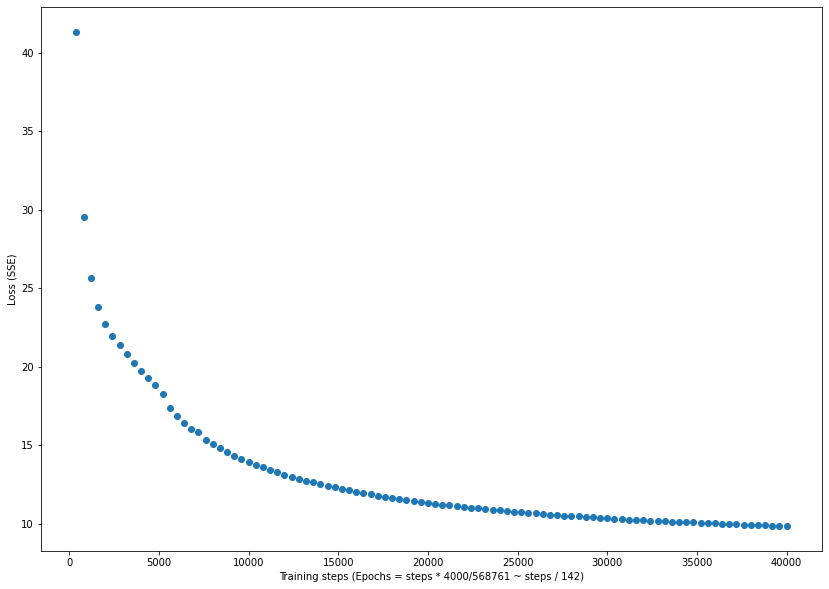

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev1['loss'] for ev1 in evaluations1]
training_steps = [ev1['global_step'] for ev1 in evaluations1]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps * 4000/568761 ~ steps / 142)')
plt.ylabel('Loss (SSE)')
plt.show()

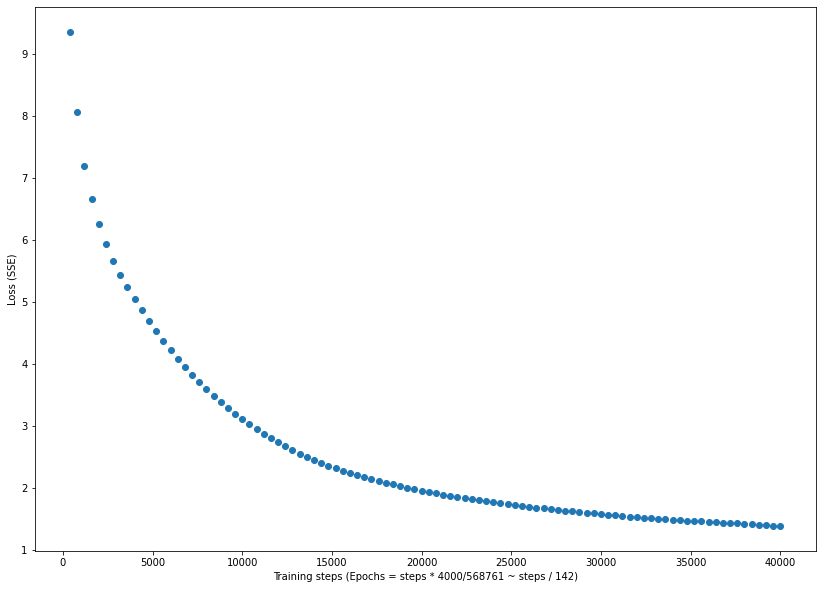

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev2['loss'] for ev2 in evaluations2]
training_steps = [ev2['global_step'] for ev2 in evaluations2]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps * 4000/568761 ~ steps / 142)')
plt.ylabel('Loss (SSE)')
plt.show()

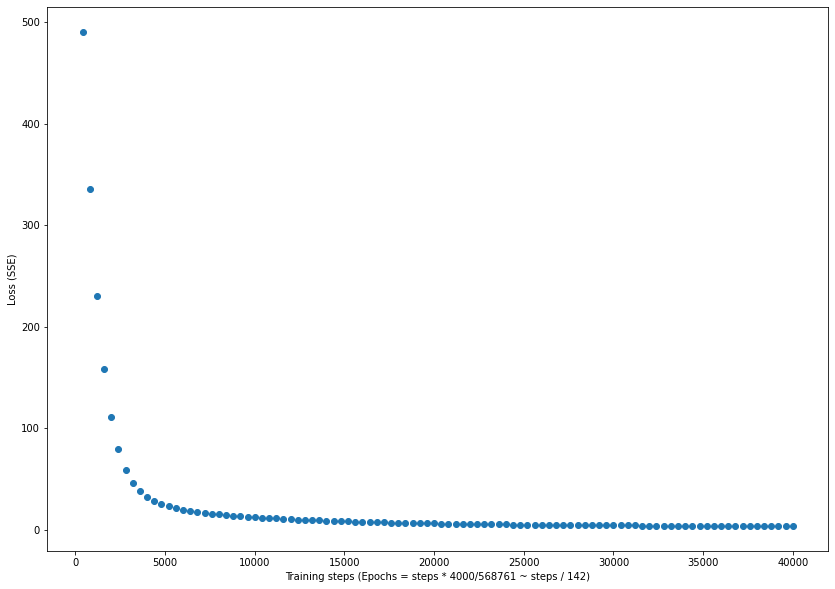

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev3['loss'] for ev3 in evaluations3]
training_steps = [ev3['global_step'] for ev3 in evaluations3]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps * 4000/568761 ~ steps / 142)')
plt.ylabel('Loss (SSE)')
plt.show()

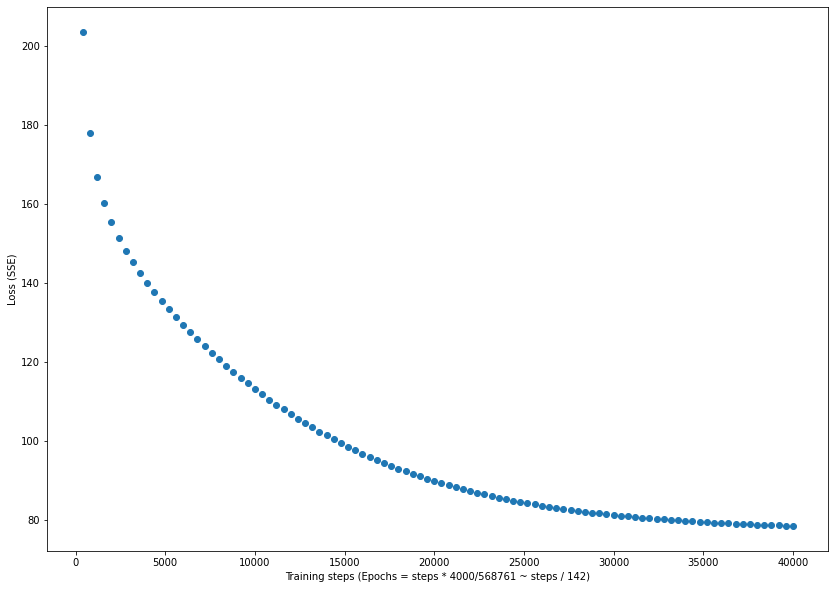

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev4['loss'] for ev4 in evaluations4]
training_steps = [ev4['global_step'] for ev4 in evaluations4]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps * 4000/568761 ~ steps / 142)')
plt.ylabel('Loss (SSE)')
plt.show()

In [24]:
pred1 = regressor1.predict(input_fn=wx_input_fn(X1_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions1 = np.array([p['predictions'][0] for p in pred1])
i = 0
while i < len(predictions1):
    #print ("%.d prediction = %.2f; real temperature = %.2f data:" % (i, predictions1[i], y1_test[i]))
    #print(X_test.iloc[i])
    i+=1

print("The Explained Variance: %.2f" % explained_variance_score(
                                            y1_test, predictions1))  
print("The Mean Absolute Error: %.2f degrees Celcius" % mean_absolute_error(
                                            y1_test, predictions1))  
print("The Median Absolute Error: %.2f degrees Celcius" % median_absolute_error(
                                            y1_test, predictions1))

The Explained Variance: 0.91
The Mean Absolute Error: 2.32 degrees Celcius
The Median Absolute Error: 1.70 degrees Celcius


In [20]:
pred2 = regressor2.predict(input_fn=wx_input_fn(X2_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions2 = np.array([p['predictions'][0] for p in pred2])
i = 0
while i < len(predictions2):
    #print ("%.d prediction = %.2f; real temperature = %.2f data:" % (i, predictions1[i], y1_test[i]))
    #print(X_test.iloc[i])
    i+=1

print("The Explained Variance: %.2f" % explained_variance_score(
                                            y2_test, predictions2))  
print("The Mean Absolute Error: %.2f ometers per second" % mean_absolute_error(
                                            y2_test, predictions2))  
print("The Median Absolute Error: %.2f meters per second" % median_absolute_error(
                                            y2_test, predictions2))

The Explained Variance: 0.69
The Mean Absolute Error: 0.90 ometers per second
The Median Absolute Error: 0.71 meters per second


In [21]:
pred3 = regressor3.predict(input_fn=wx_input_fn(X3_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions3 = np.array([p['predictions'][0] for p in pred3])
i = 0
while i < len(predictions3):
    #print ("%.d prediction = %.2f; real temperature = %.2f data:" % (i, predictions1[i], y1_test[i]))
    #print(X_test.iloc[i])
    i+=1

print("The Explained Variance: %.2f" % explained_variance_score(
                                            y3_test, predictions3))  
print("The Mean Absolute Error: %.2f millimeters of mercury" % mean_absolute_error(
                                            y3_test, predictions3))  
print("The Median Absolute Error: %.2f millimeters of mercury" % median_absolute_error(
                                            y3_test, predictions3))

The Explained Variance: 1.00
The Mean Absolute Error: 1.51 millimeters of mercury
The Median Absolute Error: 1.29 millimeters of mercury


In [22]:
pred4 = regressor4.predict(input_fn=wx_input_fn(X4_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions4 = np.array([p['predictions'][0] for p in pred4])
i = 0
while i < len(predictions4):
    #print ("%.d prediction = %.2f; real temperature = %.2f data:" % (i, predictions1[i], y1_test[i]))
    #print(X_test.iloc[i])
    i+=1

print("The Explained Variance: %.2f" % explained_variance_score(
                                            y4_test, predictions4))  
print("The Mean Absolute Error: %.2f %%" % mean_absolute_error(
                                            y4_test, predictions4))  
print("The Median Absolute Error: %.2f %%" % median_absolute_error(
                                            y4_test, predictions4))

The Explained Variance: 0.81
The Mean Absolute Error: 6.35 %
The Median Absolute Error: 4.45 %
